# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [9]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [10]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [11]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [12]:
A / A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [13]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

Uncomment the code in the next cells. You will see that tensors of different shape cannot be added or multiplied:

In [ ]:
# A + B

In [ ]:
# A * B

### Dot product

In [14]:
A.shape

(2, 3)

In [15]:
B.shape

(3, 2)

In [16]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [17]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [18]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [19]:
C.shape

(6, 2)

In [20]:
A.shape

(2, 3)

In [21]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

Uncomment the code in the next cell to visualize the error:

In [ ]:
# A.dot(C)

## Gradient descent

![](../data/banknotes.png)

In [22]:
df = pd.read_csv('../data/banknotes.csv')

In [23]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [24]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [25]:
import seaborn as sns

C:\Users\Ahmad\Anaconda3\envs\ztdl\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ahmad\Anaconda3\envs\ztdl\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ahmad\Anaconda3\envs\ztdl\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Ahmad\Anaconda3\envs\ztdl\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pas

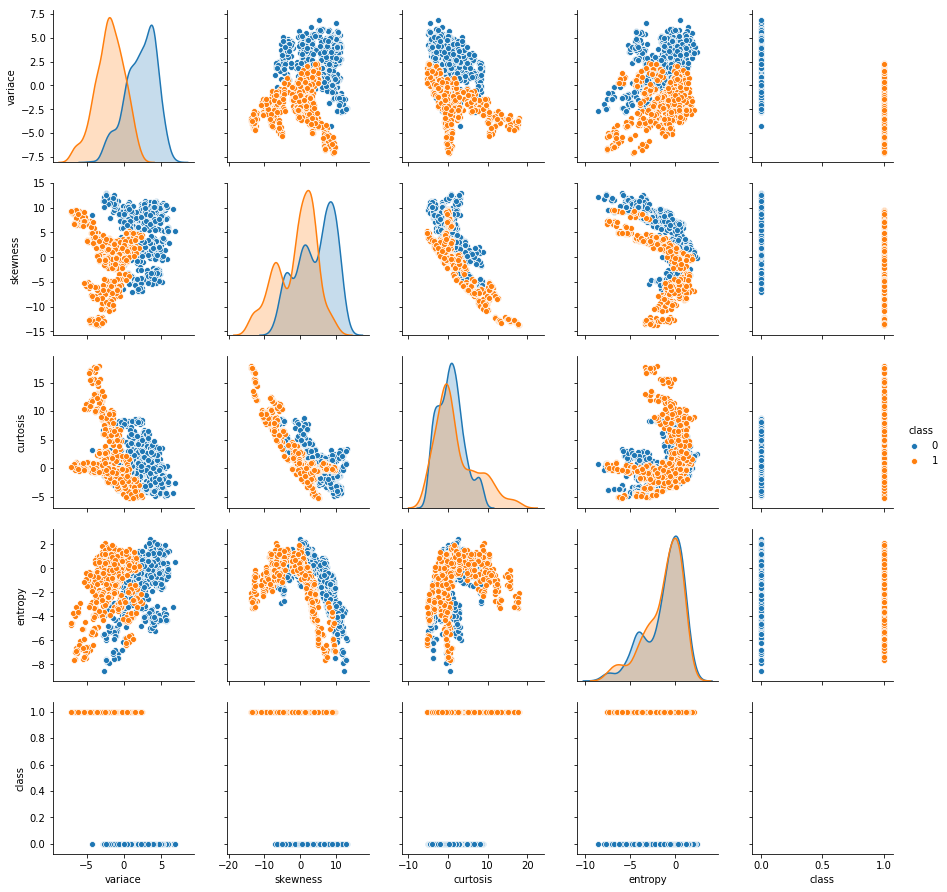

In [26]:
sns.pairplot(df, hue="class")

#### Baseline model

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [28]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [34]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

C:\Users\Ahmad\Anaconda3\envs\ztdl\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Ahmad\Anaconda3\envs\ztdl\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmad\Anaconda3\envs\ztdl\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmad\Anaconda3\envs\ztdl\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Futur

array([0.99344978, 0.99343545, 0.99781182])

### Logistic Regression Model

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [36]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [38]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=10)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 0s 358us/step - loss: 0.4657 - acc: 0.9323
Epoch 2/10
960/960 [==============================] - 0s 34us/step - loss: 0.4385 - acc: 0.9552
Epoch 3/10
960/960 [==============================] - 0s 33us/step - loss: 0.4164 - acc: 0.9542
Epoch 4/10
960/960 [==============================] - 0s 34us/step - loss: 0.3982 - acc: 0.9500
Epoch 5/10
960/960 [==============================] - 0s 34us/step - loss: 0.3829 - acc: 0.9479
Epoch 6/10
960/960 [==============================] - 0s 37us/step - loss: 0.3698 - acc: 0.9417
Epoch 7/10
960/960 [==============================] - 0s 32us/step - loss: 0.3583 - acc: 0.9406
Epoch 8/10
960/960 [==============================] - 0s 32us/step - loss: 0.3482 - acc: 0.9417
Epoch 9/10
960/960 [==============================] - 0s 41us/step - loss: 0.3392 - acc: 0.9406
Epoch 10/10
412/412 [==============================] - 0s 126us/step


In [59]:
history = model.fit(X_train, y_train,epochs=180, verbose=0)
result = model.evaluate(X_test, y_test)

412/412 [==============================] - 0s 19us/step


In [60]:
historydf = pd.DataFrame(history.history, index=history.epoch)

Text(0.5, 1.0, 'Test accuracy: 98.1 %')

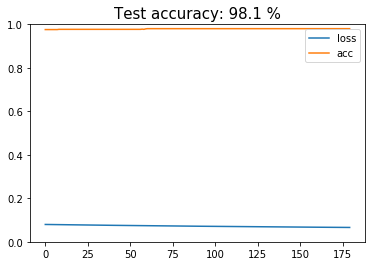

In [61]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [63]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0,epochs=9)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [64]:
historydf = pd.concat(dflist, axis=1)

In [65]:
historydf

,loss,acc,loss,acc,loss,acc,loss,acc
0,0.491534,0.834375,0.644769,0.646875,0.294499,0.957292,0.249585,0.931250
1,0.453541,0.850000,0.392599,0.901042,0.208747,0.958333,0.122633,0.968750
2,0.425420,0.860417,0.313895,0.918750,0.176017,0.960417,0.093538,0.972917
3,0.403112,0.865625,0.270504,0.928125,0.155046,0.966667,0.079203,0.976042
4,0.384698,0.871875,0.240550,0.932292,0.140031,0.967708,0.070689,0.979167
5,0.368929,0.877083,0.217869,0.940625,0.128525,0.968750,0.064816,0.979167
6,0.355034,0.884375,0.199900,0.951042,0.119438,0.969792,0.060542,0.980208
7,0.342641,0.887500,0.185207,0.954167,0.112015,0.970833,0.057289,0.980208
8,0.331430,0.892708,0.172941,0.954167,0.105801,0.971875,0.054586,0.981250


In [66]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [67]:
historydf

learning_rate      0.01                0.05                0.10            \
metric             loss       acc      loss       acc      loss       acc   
0              0.491534  0.834375  0.644769  0.646875  0.294499  0.957292   
1              0.453541  0.850000  0.392599  0.901042  0.208747  0.958333   
2              0.425420  0.860417  0.313895  0.918750  0.176017  0.960417   
3              0.403112  0.865625  0.270504  0.928125  0.155046  0.966667   
4              0.384698  0.871875  0.240550  0.932292  0.140031  0.967708   
5              0.368929  0.877083  0.217869  0.940625  0.128525  0.968750   
6              0.355034  0.884375  0.199900  0.951042  0.119438  0.969792   
7              0.342641  0.887500  0.185207  0.954167  0.112015  0.970833   
8              0.331430  0.892708  0.172941  0.954167  0.105801  0.971875   

learning_rate      0.50            
metric             loss       acc  
0              0.249585  0.931250  
1              0.122633  0.968750  
2              0.093538  0.972917  
3              0.079203  0.976042  
4              0.070689  0.979167  
5              0.064816  0.979167  
6              0.060542  0.980208  
7              0.057289  0.980208  
8              0.054586  0.981250

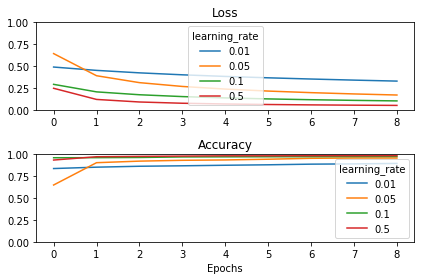

In [68]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [74]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0, epochs=10)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [75]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [76]:
historydf

batch_size       16                  32                  64             \
metric          loss       acc      loss       acc      loss       acc   
0           1.553995  0.259375  0.597601  0.662500  1.160017  0.301042   
1           1.184465  0.308333  0.573264  0.691667  1.081312  0.316667   
2           0.895416  0.416667  0.551496  0.718750  1.007989  0.331250   
3           0.695719  0.652083  0.531939  0.745833  0.940328  0.345833   
4           0.570863  0.896875  0.514247  0.763542  0.878345  0.359375   
5           0.494118  0.975000  0.498134  0.783333  0.822051  0.381250   
6           0.443983  0.963542  0.483371  0.794792  0.771323  0.422917   
7           0.408708  0.954167  0.469814  0.801042  0.725851  0.478125   
8           0.382154  0.941667  0.457242  0.811458  0.685326  0.527083   
9           0.360977  0.937500  0.445541  0.818750  0.649339  0.610417   

batch_size       128            
metric          loss       acc  
0           1.243605  0.240625  
1           1.200660  0.244792  
2           1.159620  0.245833  
3           1.120097  0.253125  
4           1.082175  0.262500  
5           1.044997  0.270833  
6           1.009839  0.281250  
7           0.976243  0.288542  
8           0.944132  0.300000  
9           0.913137  0.303125

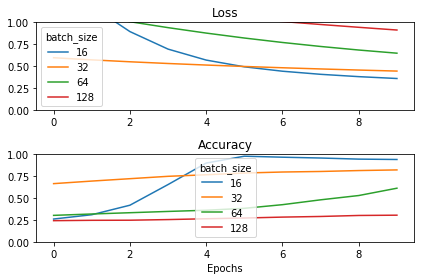

In [79]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [80]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [81]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [82]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

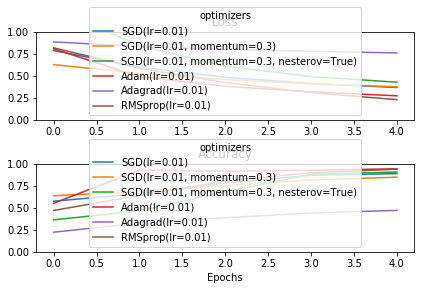

In [84]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [94]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [95]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

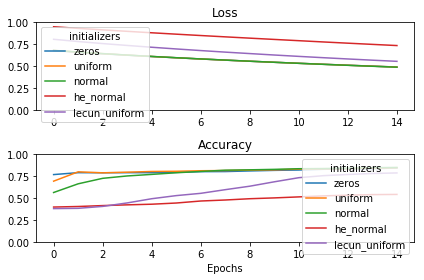

In [96]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [97]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 1s 1ms/step - loss: 0.7597 - acc: 0.5521 - val_loss: 0.6695 - val_acc: 0.5868
Epoch 2/20
672/672 [==============================] - 0s 88us/step - loss: 0.6144 - acc: 0.7054 - val_loss: 0.5932 - val_acc: 0.7153
Epoch 3/20
672/672 [==============================] - 0s 98us/step - loss: 0.5238 - acc: 0.7857 - val_loss: 0.4795 - val_acc: 0.7986
Epoch 4/20
672/672 [==============================] - 0s 109us/step - loss: 0.3857 - acc: 0.8557 - val_loss: 0.3346 - val_acc: 0.8715
Epoch 5/20
672/672 [==============================] - 0s 104us/step - loss: 0.2651 - acc: 0.8824 - val_loss: 0.2217 - val_acc: 0.9340
Epoch 6/20
672/672 [==============================] - 0s 115us/step - loss: 0.1793 - acc: 0.9345 - val_loss: 0.1411 - val_acc: 0.9549
Epoch 7/20
672/672 [==============================] - 0s 115us/step - loss: 0.1116 - acc: 0.9583 - val_loss: 0.0782 - val_acc: 0.9792
Epoch 8/20
672/672 [

In [98]:
result

[0.03247103768681149, 0.9878640776699029]

In [99]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.layers

In [101]:
inp = model.layers[0].input
out = model.layers[0].output

In [102]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [103]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [104]:
features_function = K.function([inp], [out])

In [105]:
features_function

In [106]:
features_function([X_test])[0].shape

(412, 2)

In [107]:
features = features_function([X_test])[0]

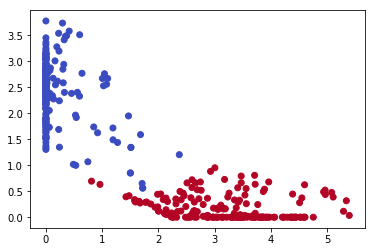

In [108]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [113]:
K.clear_session()

model = Sequential()
model.add(Dense(4, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

412/412 [==============================] - 0s 22us/step


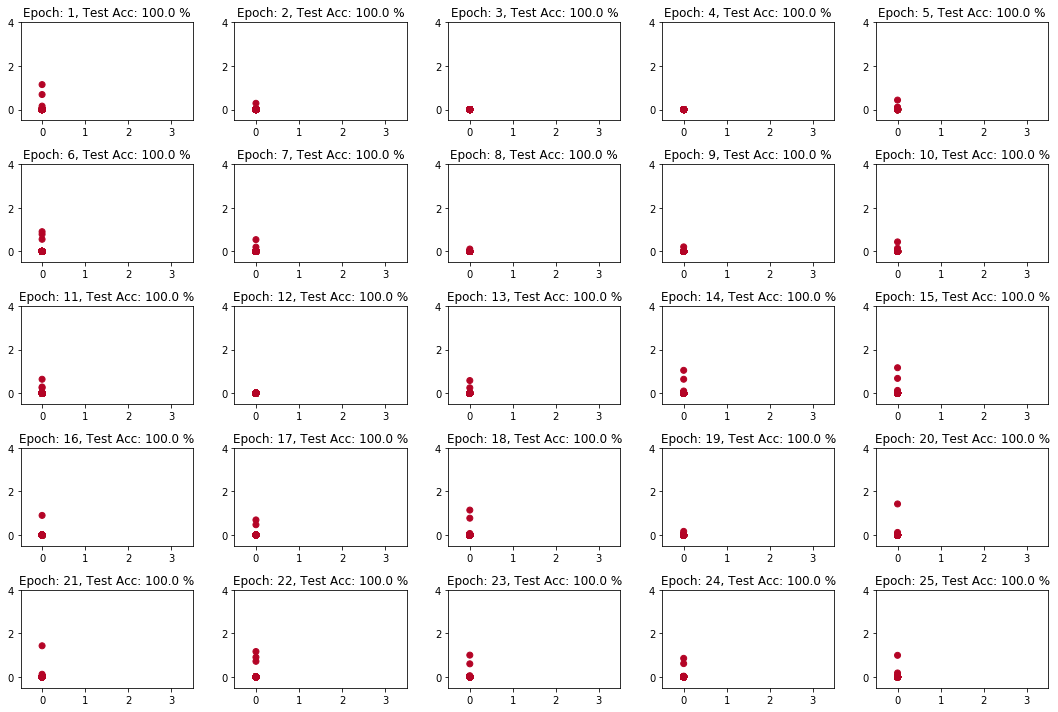

In [116]:
inp = model.layers[0].input
out = model.layers[2].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [118]:
df= pd.read_csv('../data/wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


AttributeError: 'Series' object has no attribute 'value_count'